# Conformal Lattice: Midsole Example
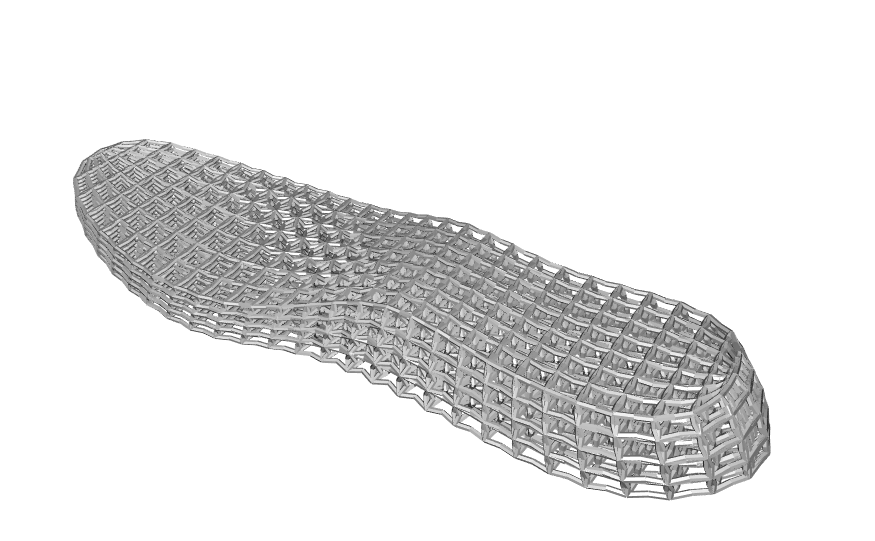

In [1]:
import genysis
t = "REPLACE_WITH_YOUR_TOKEN" # replace with your valid token

Welcome to GENYSIS


### Input requirements:

Conformal lattice function requires four nurbs surfaces (top, bottom, side1, side2 saved as stp or iges format) that envelopes the volume that needs to be filled
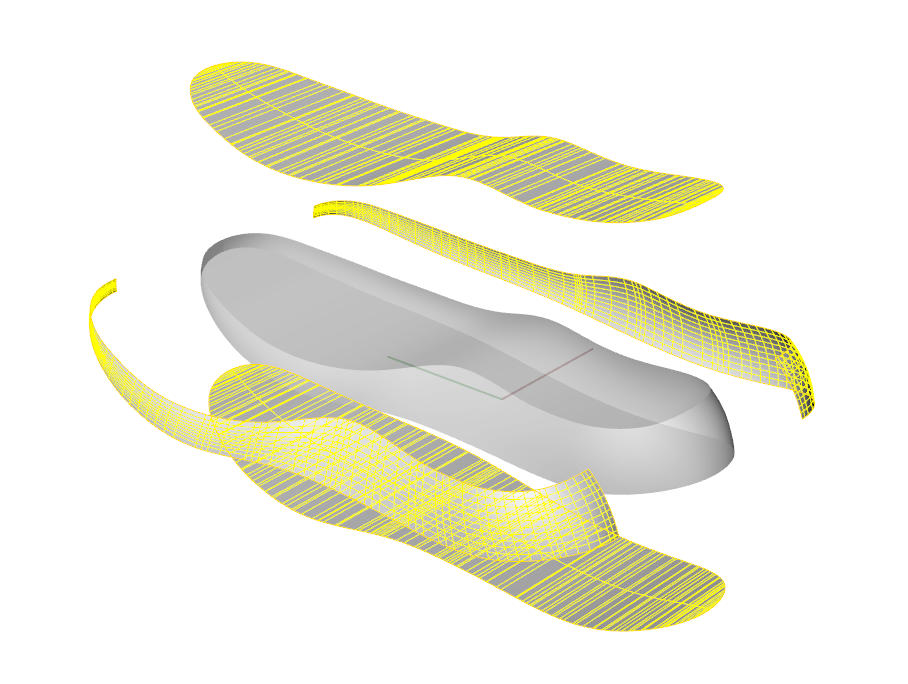

In [2]:
# uploade above surfaces files to server 
genysis.upload("models/midsole_t.stp","midsole_t.stp",t)
genysis.upload("models/midsole_b.stp","midsole_b.stp",t)
genysis.upload("models/midsole_s1.stp","midsole_s1.stp",t)
genysis.upload("models/midsole_s2.stp","midsole_s2.stp",t)

('uploading file size:', 0.093, 'MB')
[==================================================]100%
successfully uploaded models/midsole_t.stp as midsole_t.stp
('uploading file size:', 0.093, 'MB')
[==================================================]100%
successfully uploaded models/midsole_b.stp as midsole_b.stp
('uploading file size:', 0.166, 'MB')
[==================================================]100%
successfully uploaded models/midsole_s1.stp as midsole_s1.stp
('uploading file size:', 0.171, 'MB')
[==================================================]100%
successfully uploaded models/midsole_s2.stp as midsole_s2.stp


{u'message': u'midsole_s2.stp uploaded to test@test.com/midsole_s2.stp'}

In [3]:
# create 3D conformal lattice grid from given surface defination
conformalLattice = genysis.conformalLattice() # initialize conformal lattice class
conformalLattice.setEPSILON(0.1) # a tolerance value to join and clean up small lines

conformalLattice.setSurfaces(top = "midsole_t.stp",bottom = "midsole_b.stp",side1 = "midsole_s1.stp",side2 = "midsole_s2.stp") # input volume surfaces defination 
conformalLattice.setUVW(30,8,5) # uvw resolution for conformal grid
conformalLattice.setGridOutput("midsole_grid.json") # output file name
conformalLattice.genGrid(t) # call the api to generate the grid

genysis.visualize("midsole_grid.json",t,True)

('request: ', '{"bottom": "midsole_b.stp", "top": "midsole_t.stp", "filename": "midsole_grid.json", "u": 30, "t": "REPLACE_WITH_YOUR_TOKEN", "w": 5, "v": 8, "output": "midsole_grid.json", "side2": "midsole_s2.stp", "side1": "midsole_s1.stp"}')
('response: ', u'["midsole_grid.json"]\n')
https://studiobitonti.appspot.com/apps/visualize?name=midsole_grid.json&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=midsole_grid.json&t=REPLACE_WITH_YOUR_TOKEN'

In [4]:
# generate two different cells to apply on the 3D grid
cell_0 = 'cell_0.obj'
cell_1 = 'cell_1.obj'

genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0.1,cBendIn=0,connectPt=0,output=cell_0,token=t)
genysis.visualize(cell_0,t,True,300,300)

genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=1,cBendIn=0,connectPt=0,output=cell_1,token=t)
genysis.visualize(cell_1,t,True,300,300)

('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0.1, "centerChamfer": 0, "filename": "cell_0.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "connectPt": 0}')
('response: ', u'["cell_0.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=cell_0.obj&t=REPLACE_WITH_YOUR_TOKEN


('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 1, "centerChamfer": 0, "filename": "cell_1.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "connectPt": 0}')
('response: ', u'["cell_1.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=cell_1.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=cell_1.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [5]:
# example of applying one type of lattice unit to the grid
conformalLattice.setComponent('cell_0.obj')
conformalLattice.setOutput('conformalLattice_0.obj')
conformalLattice.populateLattice(t)
genysis.visualize('conformalLattice_0.obj',t,True,500,500)

('request: ', '{"EPSILON": 0.1, "component": "cell_0.obj", "filename": "conformalLattice_0.obj", "blendTargets": [], "boxes": "midsole_grid.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["conformalLattice_0.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_0.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_0.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [10]:
# example of applying two typle of lattice units using a point attractor
conformalLattice.attractorSet = [] # clean up added attractors
conformalLattice.setComponent('cell_0.obj')
conformalLattice.setOutput('conformalLattice_1.obj')
conformalLattice.addPointAttractor(component="cell_1.obj",point=[0,0,0],range=80)
conformalLattice.populateLattice(t)
genysis.visualize('conformalLattice_1.obj',t,True)

('request: ', '{"EPSILON": 0.1, "component": "cell_0.obj", "filename": "conformalLattice_1.obj", "blendTargets": [{"attractor": {"range": 80, "point": [0, 0, 0]}, "component": "cell_1.obj"}], "boxes": "midsole_grid.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["conformalLattice_1.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_1.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_1.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [9]:
# example of applying two typle of lattice units using a plane attractor
conformalLattice.attractorSet = [] # clean up added attractors
conformalLattice.setComponent('cell_0.obj')
conformalLattice.setOutput('conformalLattice_2.obj')
conformalLattice.addPlaneAttractor(component="cell_1.obj",plane=[0,1,0,-100],range=200)
conformalLattice.populateLattice(t)
genysis.visualize('conformalLattice_2.obj',t,True)

('request: ', '{"EPSILON": 0.1, "component": "cell_0.obj", "filename": "conformalLattice_2.obj", "blendTargets": [{"attractor": {"range": 200, "plane": [0, 1, 0, -100]}, "component": "cell_1.obj"}], "boxes": "midsole_grid.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["conformalLattice_2.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_2.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_2.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [13]:
# example of applying two typle of lattice units using a curve attractor
conformalLattice.attractorSet = [] # clean up added attractors
conformalLattice.setComponent('cell_0.obj')
conformalLattice.setOutput('conformalLattice_3.obj')
conformalLattice.addCurveAttractor(component="cell_1.obj",curve=[[20,-200,0],[-20,0,0],[20,100,0],[0,150,0]],range=30)
conformalLattice.populateLattice(t)
genysis.visualize('conformalLattice_3.obj',t,True)

('request: ', '{"EPSILON": 0.1, "component": "cell_0.obj", "filename": "conformalLattice_3.obj", "blendTargets": [{"attractor": {"range": 30, "curve": [[20, -200, 0], [-20, 0, 0], [20, 100, 0], [0, 150, 0]]}, "component": "cell_1.obj"}], "boxes": "midsole_grid.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["conformalLattice_3.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_3.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=conformalLattice_3.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [12]:
# use marching cube to create final tubed lattice geometry
genysis.marchingCube(
    'conformalLattice_3.obj', # input obj lines file
    200, # meshing resolution
    1, # member thickness
    "Marching_Cube_Example.stl", # output file name
    t, # token
    preview=True # set to False to generate printable water-tight version of geometry
)

genysis.visualize("Marching_Cube_Example.stl",t,True)

('request: ', '{"memberThickness": 1, "lines": "conformalLattice_3.obj", "filename": "Marching_Cube_Example.stl", "t": "REPLACE_WITH_YOUR_TOKEN", "preview": true, "resolution": 200}')
('response: ', u'["Marching_Cube_Example.stl"]')
https://studiobitonti.appspot.com/apps/visualize?name=Marching_Cube_Example.stl&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=Marching_Cube_Example.stl&t=REPLACE_WITH_YOUR_TOKEN'